# Import Library

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/anisayari/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


# Import Data

In [3]:
train = pd.read_csv("X_train.csv", index_col=0, error_bad_lines=False)
test = pd.read_csv("X_test.csv", index_col=0, error_bad_lines=False)
y = pd.read_csv("y_train.csv", index_col=0)

len_train = len(train)
print('train shape = {}, test shape = {}'.format(train.shape, test.shape))

train shape = (8880, 30), test shape = (2960, 30)


b'Skipping line 2168: expected 31 fields, saw 33\nSkipping line 4822: expected 31 fields, saw 37\nSkipping line 4859: expected 31 fields, saw 37\nSkipping line 7342: expected 31 fields, saw 37\n'


In [4]:
train_test = pd.concat((train, test), axis=0)
train_test=train_test.reset_index(drop=True)
print('train_test = {}'.format(train_test.shape))

train_test = (11840, 30)


In [5]:
numerical_columns = train_test.select_dtypes(['int64','float64']).columns.tolist()
object_columns = train_test.select_dtypes(['object']).columns.tolist()

In [6]:
train_with_labels = train
train_with_labels['label'] = y

0    3027
2    2953
1    2900
Name: label, dtype: int64


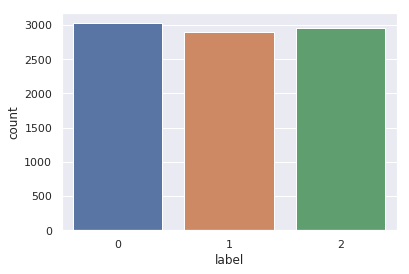

In [7]:
# Distribution of target feature 
print(train_with_labels.label.value_counts())
sns.countplot(x='label', data=train_with_labels)

# Descriptive Analysis

In [8]:
train_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
images_count,11840,NaN,NaN,NaN,3.65465,2.05784,0,2,3,5,29
image_width,11770,NaN,NaN,NaN,1804.89,1021.47,58,1000,1536,2448,5472
image_height,11770,NaN,NaN,NaN,1800.66,1103.08,64,962.75,1536,2448,6016
image_url,11770,11681,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_description,11840,11768,<br>Fabriqué à par les artisans-apprenants d'E...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_size,3232,33,38,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
material,5252,2174,Coton,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,168,18,4a,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
warranty,127,2,6 mois,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1983,NaN,NaN,NaN,11667,431160,0,1979,1998,2007,1.92019e+07


In [31]:
# Percetage of NaN values in Train
pd.DataFrame({'number_of_nan_train':train.isna().sum().tolist(),
              'percentage_of_nan_train': (train.isna().mean()* 100).round(1).tolist()},
             index=train.columns).sort_values(by=['number_of_nan_train'], ascending=False)

,number_of_nan_train,percentage_of_nan_train
sub_category_4,8810,99.2
wifi,8797,99.1
product_length,8790,99.0
warranty,8779,98.9
product_width,8773,98.8
product_height,8767,98.7
age,8760,98.6
shoe_size,8657,97.5
sub_category_3,7953,89.6
author,7468,84.1


In [34]:
# Percetage of NaN values in Train
pd.DataFrame({'number_of_nan_test':test.isna().sum().tolist(),
              'percentage_of_nan_test': (test.isna().mean()* 100).round(1).tolist()},
             index=test.columns).sort_values(by=['number_of_nan_test'], ascending=False)

,number_of_nan_test,percentage_of_nan_test
wifi,2942,99.4
sub_category_4,2938,99.3
warranty,2934,99.1
product_length,2919,98.6
product_width,2914,98.4
age,2912,98.4
product_height,2910,98.3
shoe_size,2883,97.4
sub_category_3,2659,89.8
author,2489,84.1


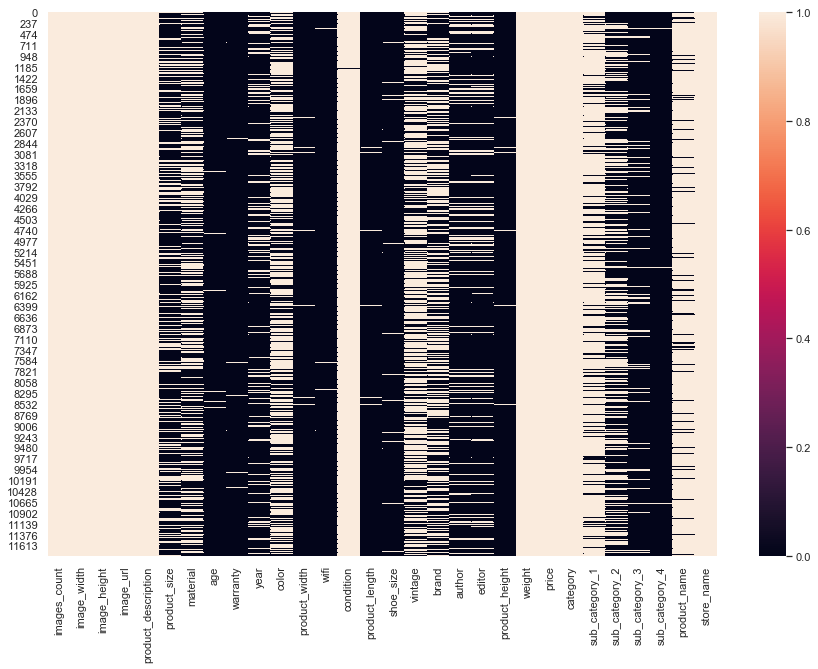

In [10]:
plt.figure(figsize=(15,10))

arr = train_test.copy().notnull().astype('int')
sns.heatmap(arr)

# Correlation Matrix (Train with labels)

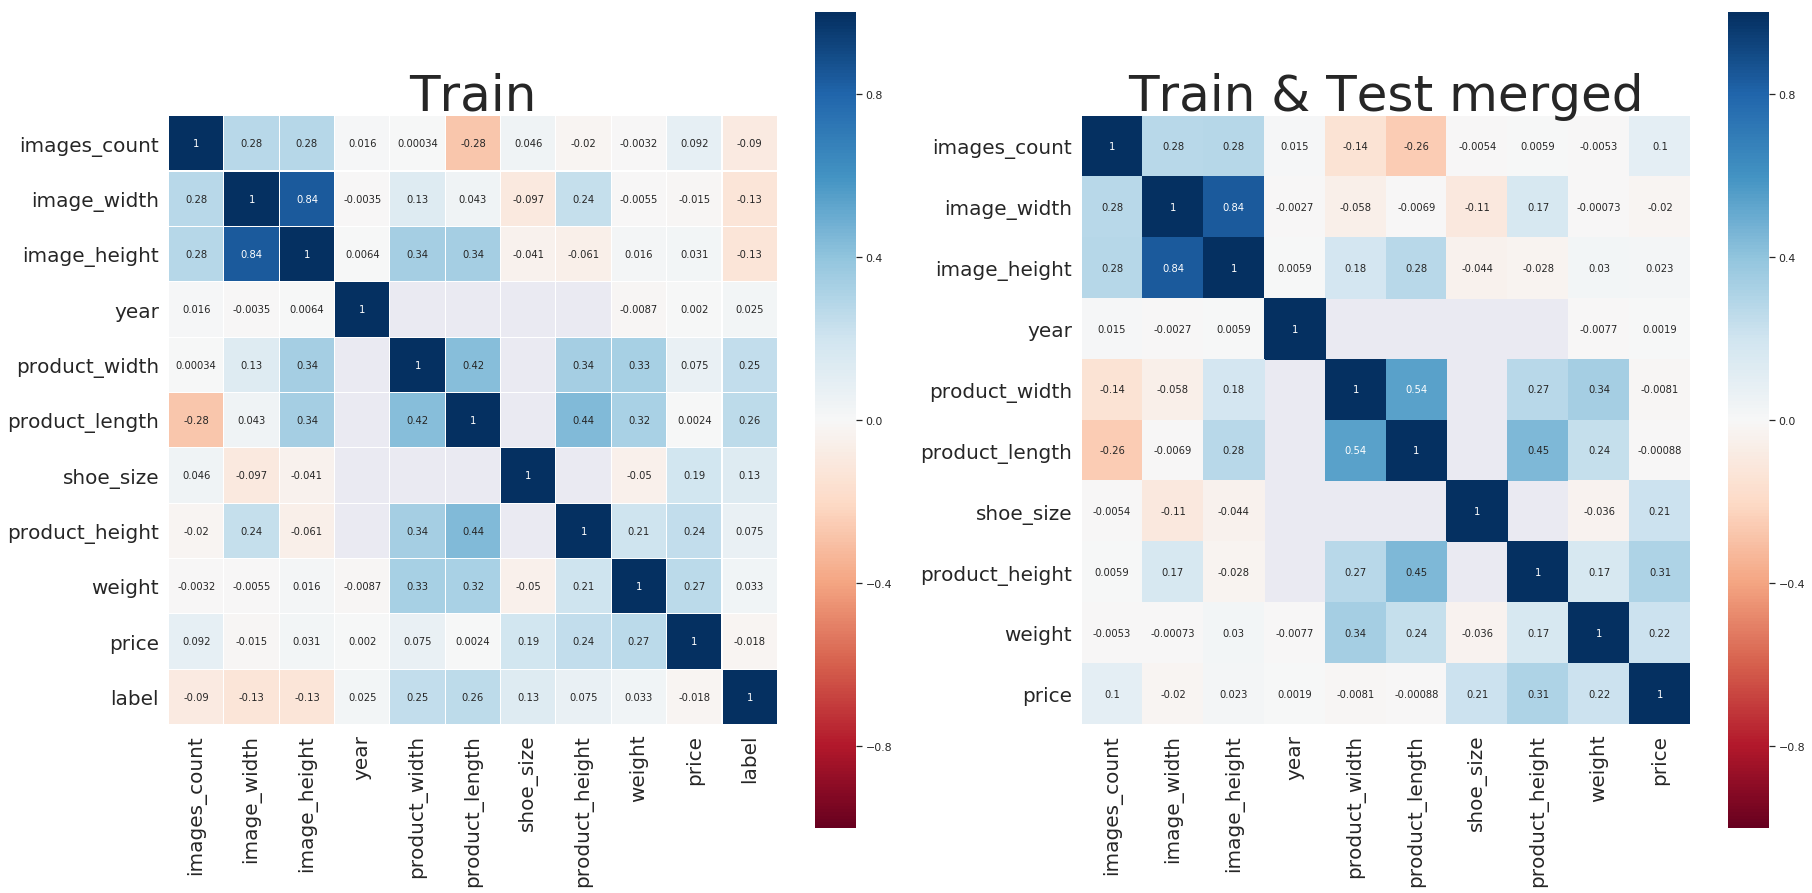

In [50]:
statistique_test = 'pearson'
fig, axs = plt.subplots(ncols=2,figsize=(30,15))
sns.heatmap(
    train_with_labels.corr(statistique_test),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    vmin = -1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True,
    ax=axs[0])

sns.heatmap(
    train_test.corr(statistique_test),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    vmin = -1.0,
    linecolor='white',
    square=True,
    annot=True,
    ax=axs[1])

axs[0].set_title('Train',fontsize=50)
axs[0].tick_params(labelsize=20)

axs[1].set_title('Train & Test merged',fontsize=50)
axs[1].tick_params(labelsize=20)


# Correlation Matrix (train_test)

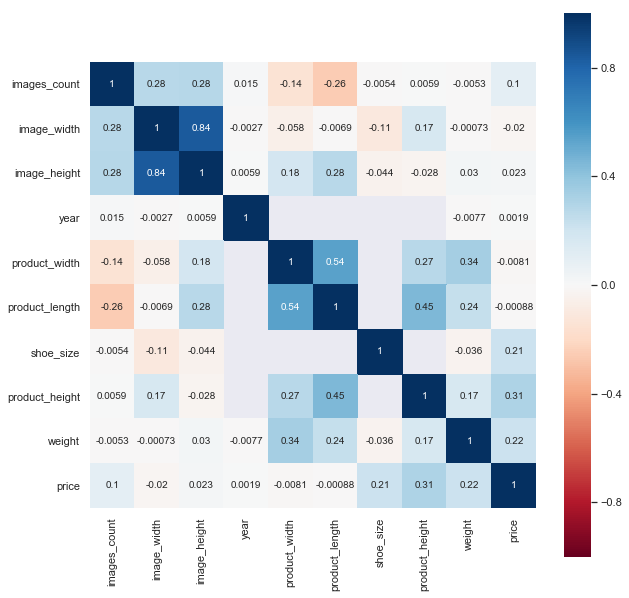

In [12]:
statistique_test = 'pearson'
plt.figure(figsize=(10,10))


# Boxplot

In [13]:
def display_boxplot(columns_to_consider, df):
    plt.figure(figsize=(20,25))
    i=0
    for columns_ in columns_to_consider:
        i+=1
        plt.subplot(5, 4, i)
        sns.boxplot(x=df["label"], y=columns_, data=df, palette = "viridis")

    plt.show()

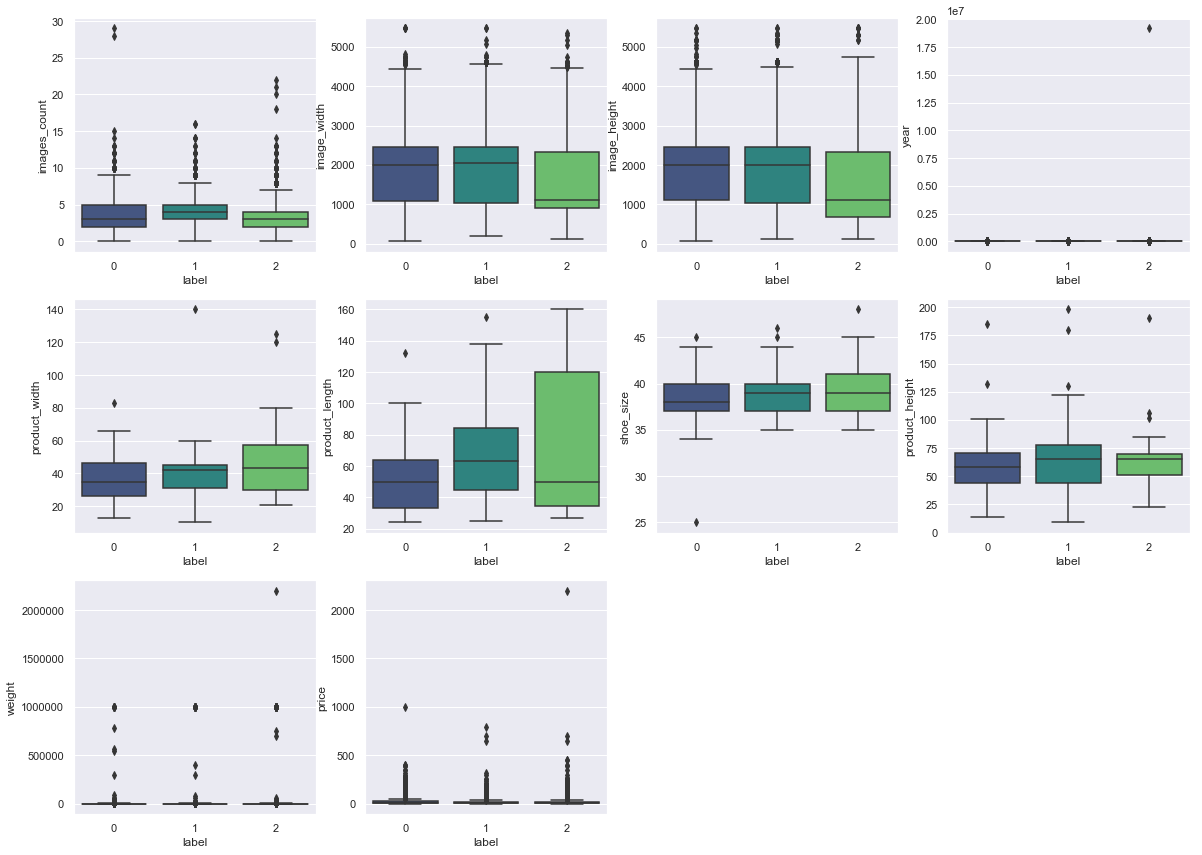

In [14]:
display_boxplot(numerical_columns, train_with_labels)

# Pairplot

In [64]:
sns.pairplot(train_with_labels[numerical_columns+['label']['product_width']].fillna(-1).sample(100),size = 2,hue="label", diag_kind='auto')

TypeError: unsupported operand type(s) for -: 'list' and 'list'

# Distribution

In [16]:
def display_distribution(columns_to_consider, train, test):

    plt.figure(figsize=(20,25))
    i = 0

    for column_ in columns_to_consider:
        i += 1
        plt.subplot(5, 4, i)
        sns.distplot(test[column_], label='Test set', hist=False)
        sns.distplot(train[column_], label='Train set', hist=False)
        plt.legend()
        plt.xlabel(column_, fontsize=12)

    plt.show()

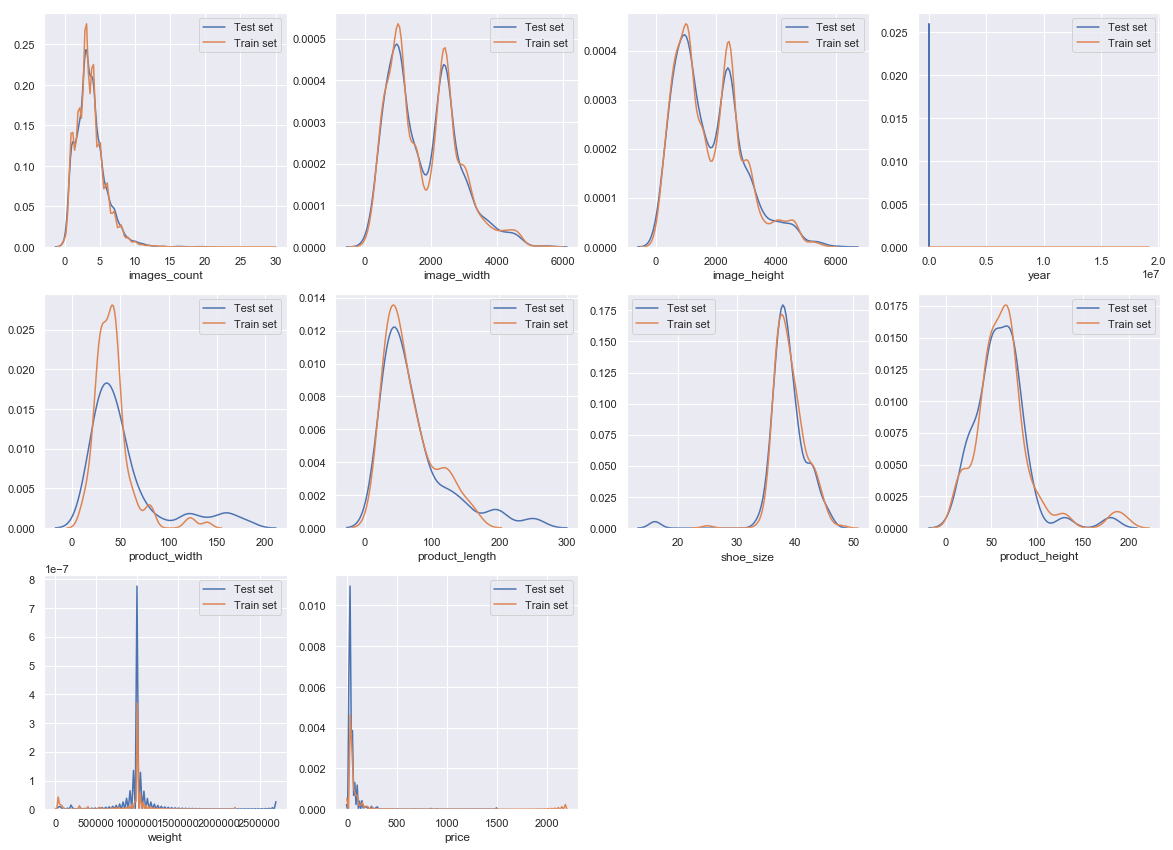

In [17]:
display_distribution(numerical_columns, train, test)